In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from statannot import add_stat_annotation

from pathlib import Path

p = Path('/home/shussain/FADS/Conf/')
iterator = p.glob("n1200/results/d_*/h2s_*/sim_*/")

for path in iterator:
    d = path.parts[7][2:]
    with open(path / "n_causals.csv", 'r') as og:
        with open(path / "n_causals1.csv", 'w') as new:
            for og_line in og:
                new.write(og_line[:-1] + f",{d}\n")
        

In [1]:
cp = sns.color_palette("Set1")
cp

NameError: name 'sns' is not defined

In [19]:
sns.set_theme(
    context = 'paper',
    palette='Set1',
    style = 'whitegrid',
    font_scale = 4
)

In [45]:
import utils

ModuleNotFoundError: No module named 'utils'

In [35]:
with open("counts", 'r') as f:
    for l in f.readlines():
        if int(l.split()[0]) < 8:
            print(l)

     4 n600/results/d_10000/h2s_0.5/sim_2/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_28/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_30/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_32/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_35/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_36/n_causals1.csv

     4 n600/results/d_10000/h2s_0.7/sim_5/n_causals1.csv

     5 n600/results/d_3000/h2s_0.5/sim_36/n_causals1.csv



In [43]:
H2s = [0.5, .7, .7, .7, .7, .7, .7, .5]
D = [10000]*7 + [3000]
I = [2, 28, 30, 32, 35, 36, 5, 36]

for h2s, d, i in zip(H2s, D, I):
    print(f"{i} ln {h2s} {d}")

2 ln 0.5 10000
28 ln 0.7 10000
30 ln 0.7 10000
32 ln 0.7 10000
35 ln 0.7 10000
36 ln 0.7 10000
5 ln 0.7 10000
36 ln 0.5 3000


In [33]:
l[0].split()

['8', 'n600/results/d_10000/h2s_0.3/sim_10/n_causals1.csv']

In [236]:
def extend_with_extra_elements(*some_lists):
    max_some_lists_length = max(map(len, some_lists))
    for some_list in some_lists:
        extra_elements_count = max_some_lists_length - len(some_list)
        extra_elements = ['X'] * extra_elements_count
        yield some_list + extra_elements

In [ ]:
def plot_criter(df, crit, d, legend=True):
    fig, axes = plt.subplots(4, 3, figsize=(20, 20), squeeze=False, sharex=True, sharey=True)
    dff = df.query(f"d == {d}")
    
    if crit=="n_causals":
        plt.yticks(ticks=2*np.arange(7))
        plt.suptitle("# of causal SNPs, n=600")
    elif crit=="svm":
        plt.suptitle("SVM AUC")
    elif crit=="lr":
        plt.suptitle("Logistic regression AUC") 
        
    plt.tight_layout()

    for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
        plt.sca(ax)

        dfff = dff.query(f"k == {k} and h2s == {h2s}")
        print(len(dfff[f"{crit}"]))
        sns.boxplot(x=dfff["method"], y=dfff[f"{crit}"], order=["p", "ln"])
        
        
        if k==5:
            plt.title(f"$h^2_s = {h2s}$")
        if h2s == 0.3:
            plt.ylabel(f"AUC ($k={k}$)")
        else:
            plt.ylabel("")
        
        plt.xlabel("")
        plt.xticks([])
                  

        test_results = add_stat_annotation(
            ax, x=dfff["method"], y=dfff[f"{crit}"], 
            order=["p", "ln"],
            box_pairs=[
                ("p", "ln")
            ],
            test='Wilcoxon', text_format='star',
            loc='inside', verbose=0,
            pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
        )
        #plt.title(f"$h^2_s$ = {h2s}, $k$ = {k}")


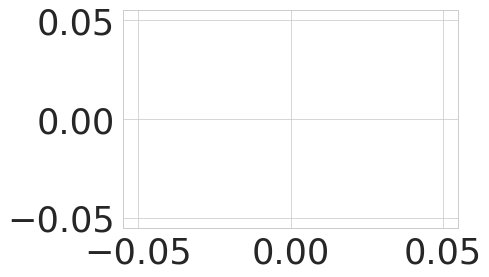

<Figure size 216x144 with 0 Axes>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cp = sns.color_palette("Set1")

fig = plt.figure()
leg = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
lines=[ax.plot([], color=cp[0], lw=10, mec='black')[0], ax.plot([], color=cp[1], lw=10)[0]]
leg.legend(lines, ["p value thresholding", "LassoNet"],loc='center')
leg.savefig("leg.jpeg", bbox_inches='tight')

100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox
100
Using zero_method  wilcox


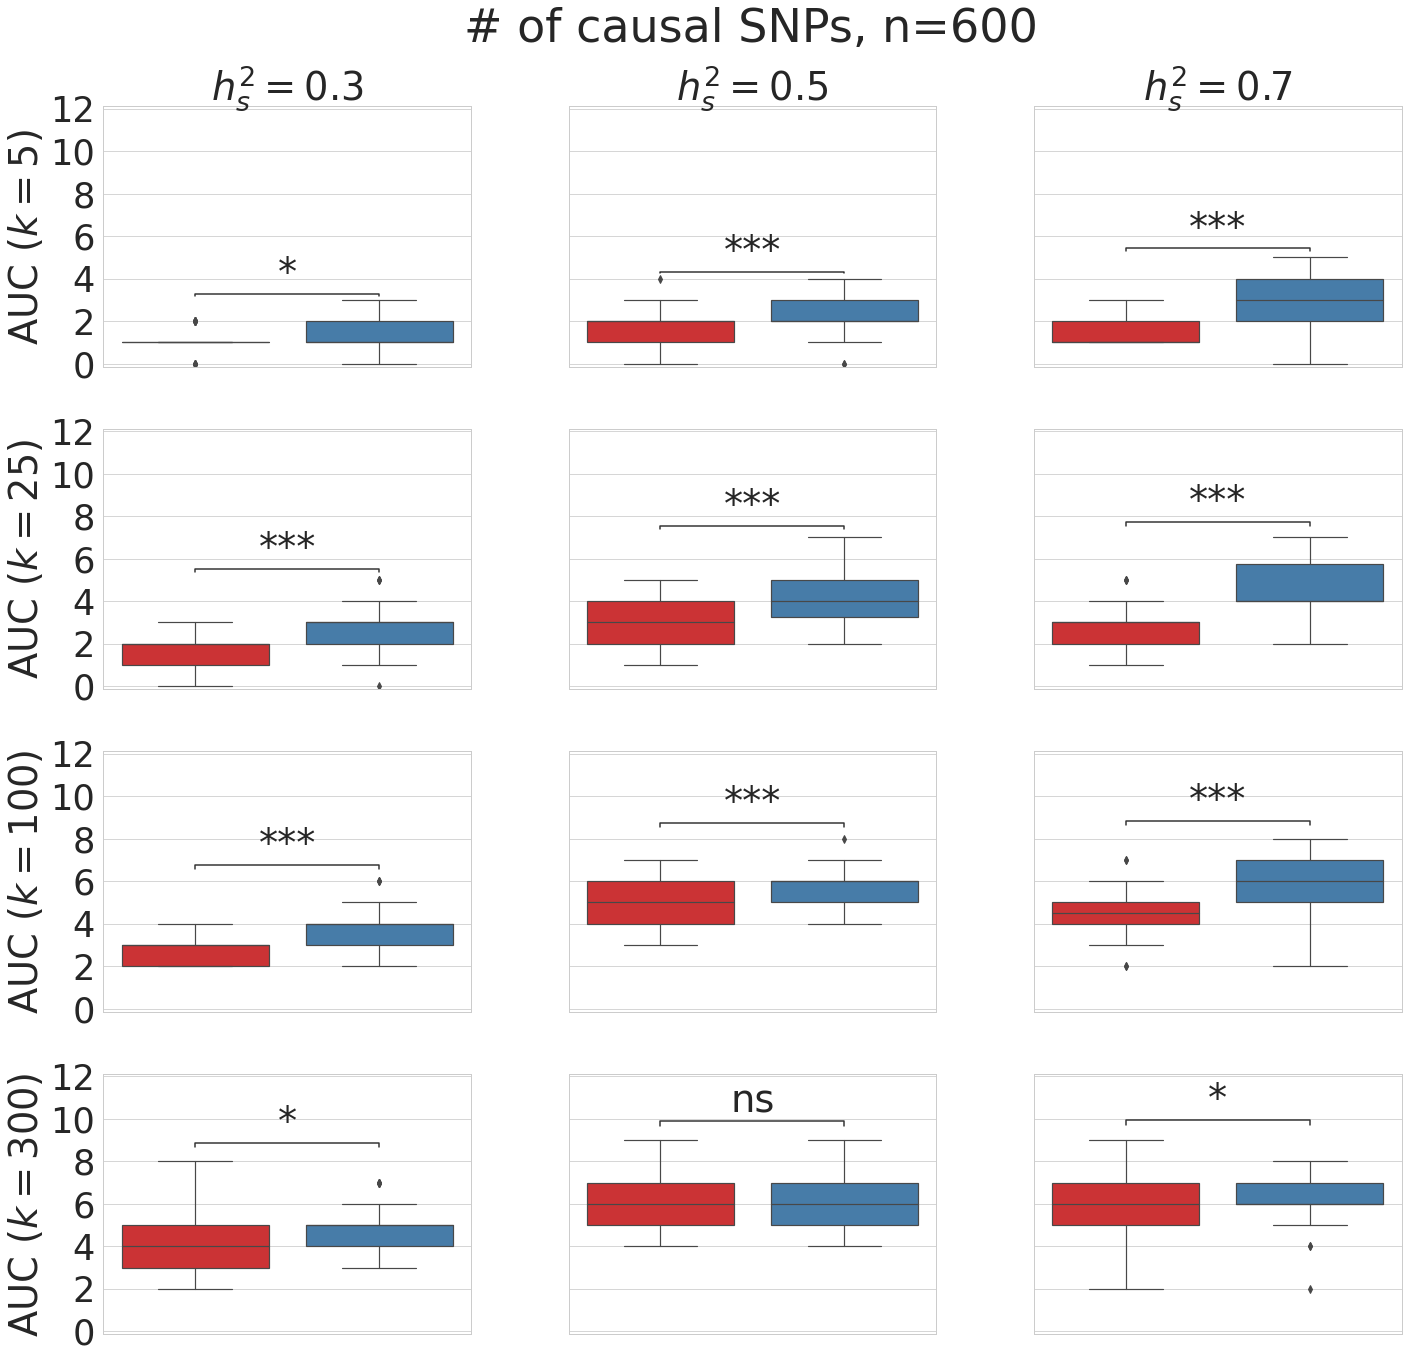

In [29]:
plot_criter("n_causals", 3000)
plt.savefig("final plots/n_causals_3k_1200.jpeg", bbox_inches='tight')

In [148]:
from FADS.input import get_dset

In [150]:
dset = get_dset("/home/shussain/Simulated_data/22082021/3000/0.7/sim_11/sim_11/PS/output/")

generating p values:   0%|          | 0/3000 [00:00<?, ?it/s]

In [166]:
dset["X_test"] = dset["X_test"][:120]
dset["X_train"] = dset["X_train"][:480]

(480, 3000)

In [169]:
dset["y_train"][:120]

(120, 2)

In [18]:
from FADS.utils import mkoutdir

mkoutdir("n1200", d=[1000, 3000, 10000], h2s=[0.3, 0.5, 0.7], sim=range(1, 51))

In [53]:
df = pd.read_csv("n600.csv", names=["h2s", "i", "k", "method", "n_causals", "svm", "lr", "d"])
df

,h2s,i,k,method,n_causals,svm,lr,d
0,0.3,10,5,ln,2,0.618604,0.628615,10000
1,0.3,10,25,ln,3,0.558676,0.670745,10000
2,0.3,10,100,ln,3,0.652392,0.715795,10000
3,0.3,10,300,ln,5,0.687430,0.755562,10000
4,0.3,10,5,p,1,0.435206,0.632091,10000
...,...,...,...,...,...,...,...,...
3595,0.7,9,300,ln,6,0.870510,0.878864,3000
3596,0.7,9,5,p,1,0.442634,0.745614,3000
3597,0.7,9,25,p,1,0.457254,0.771234,3000
3598,0.7,9,100,p,4,0.738791,0.891674,3000


In [52]:
df.groupby(["h2s", "i", "k", "d"]).count().query("method > 2")

,,,,method,n_causals,svm,lr
h2s,i,k,d,,,,
0.5,36,5,3000,3,3,3,3


In [10]:
df.query("h2s == 0.7 and k == 5 and i==10")

,h2s,i,k,method,n_causals,svm,lr,d
796,0.7,10,5,ln,2,0.518881,0.671608,10000
800,0.7,10,5,p,2,0.499161,0.733846,10000
1972,0.7,10,5,ln,4,0.621352,0.872334,1000
1976,0.7,10,5,p,2,0.357744,0.836981,1000
3169,0.7,10,5,ln,3,0.743665,0.851434,3000
3173,0.7,10,5,p,1,0.309942,0.772208,3000


In [275]:
df["h2s"]

0       0.3
1       0.3
2       0.3
3       0.3
4       0.3
       ... 
3564    0.7
3565    0.7
3566    0.7
3567    0.7
3568    0.7
Name: h2s, Length: 3569, dtype: float64

In [280]:
sum(50 == lndf["i"])

36

In [288]:
50 in lndf["i"].values

True

In [12]:
lndf = df.query("method == 'ln'")
all_tri = list(product(lndf["i"].unique(), lndf["h2s"].unique(), lndf["k"].unique(), lndf["d"].unique()))
for i, h2s, k, d in product(range(1, 51), [0.3, 0.5, 0.7], [5, 25, 100, 300], [1000, 3000, 10000]):
    if not (i, h2s, k, d) in all_tri:
        print(h2s, i, k, d)

In [14]:
list(product(lndf["i"].unique(), lndf["h2s"].unique(), lndf["k"].unique(), lndf["d"].unique())) == list(product(range(1, 51), [0.3, 0.5, 0.7], [5, 25, 100, 300], [1000, 3000, 10000]))

False

In [247]:
df.query("h2s==0.5 and method == 'ln' and k==5")

,h2s,i,k,method,n_causals,svm,lr,d
404,0.5,10,5,ln,2,0.510138,0.759082,10000
412,0.5,11,5,ln,1,0.538886,0.786623,10000
420,0.5,12,5,ln,1,0.457459,0.691434,10000
428,0.5,13,5,ln,1,0.537510,0.575577,10000
436,0.5,14,5,ln,2,0.555339,0.728309,10000
...,...,...,...,...,...,...,...,...
3129,0.5,5,5,ln,2,0.630350,0.749790,3000
3141,0.5,6,5,ln,3,0.558120,0.755562,3000
3145,0.5,7,5,ln,3,0.485139,0.818750,3000
3153,0.5,8,5,ln,2,0.503198,0.781563,3000


In [108]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Causals

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


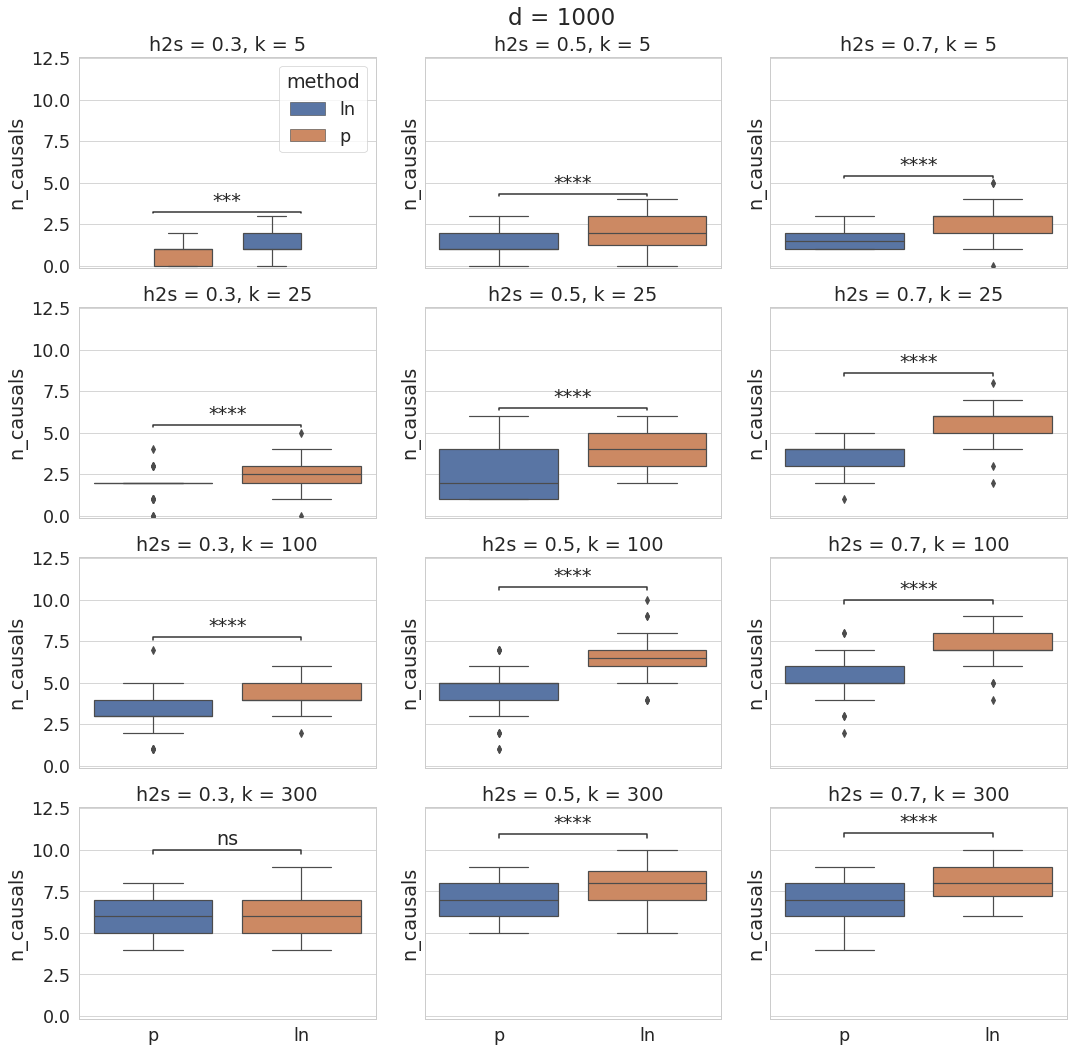

In [55]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()
fig.suptitle("d = 1000")
dff = df.query("d == 1000")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    if k==5 and h2s==0.3:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], hue = dfff["method"], order=["p", "ln"])
    else:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], order=["p", "ln"])
    plt.xlabel("")
    
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln"],
        box_pairs=[
            ("p", "ln")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


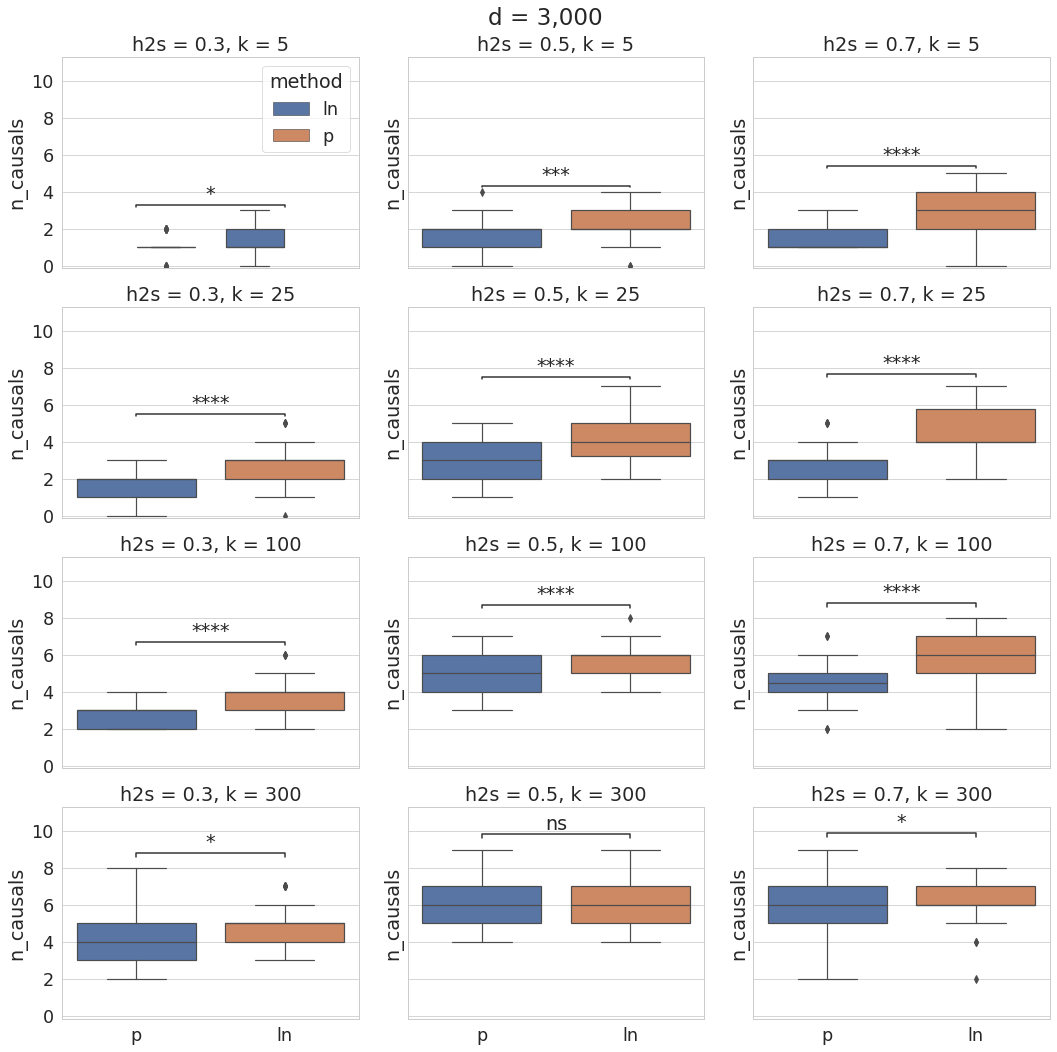

In [56]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()
fig.suptitle("d = 3,000")
dff = df.query("d == 3000")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    if k==5 and h2s==0.3:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], hue = dfff["method"], order=["p", "ln"])
    else:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], order=["p", "ln"])
    plt.xlabel("")
    
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


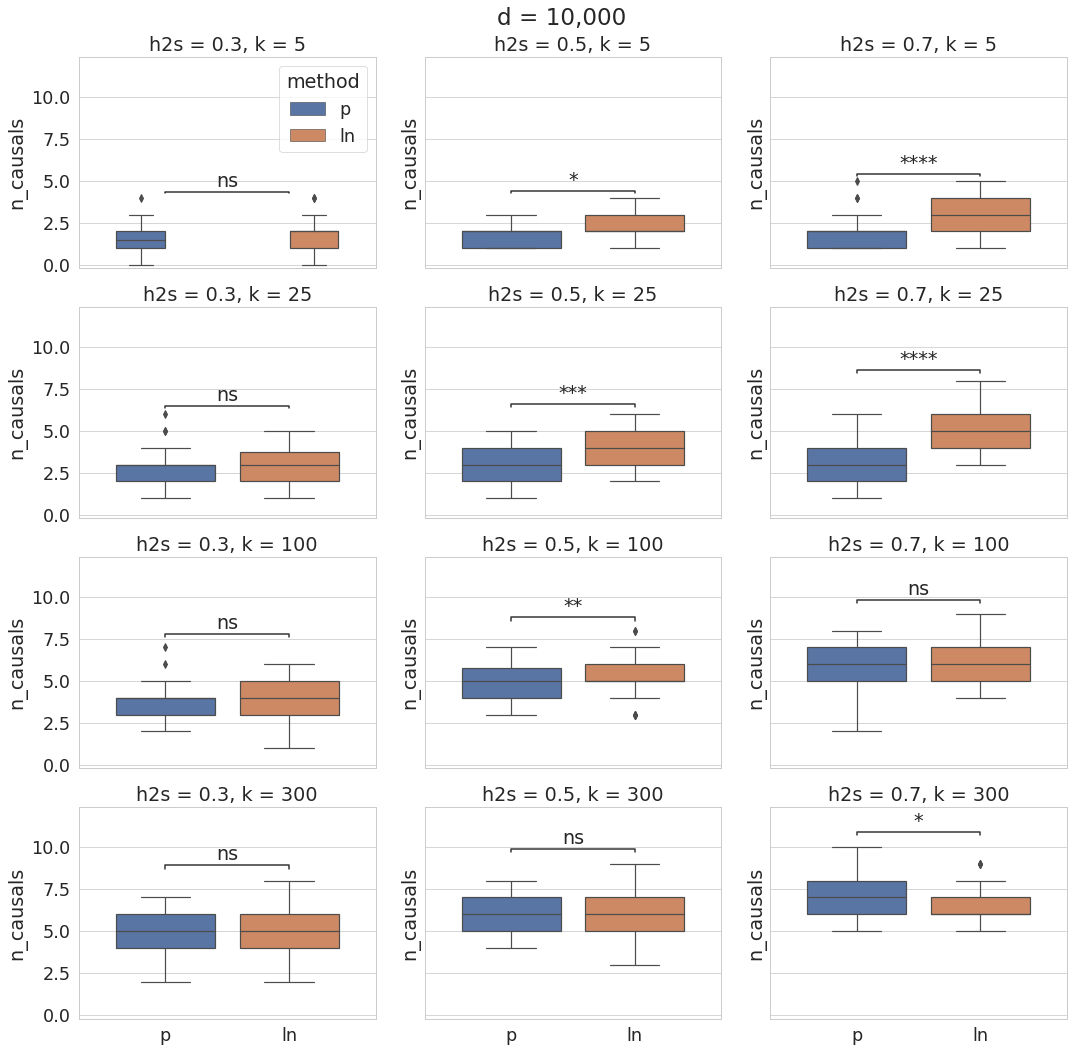

In [59]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()
fig.suptitle("d = 10,000")
dff = df.query("d == 10000")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    if k==5 and h2s==0.3:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], hue = dfff["method"], order=["p", "ln"])
    else:
        sns.boxplot(x=dfff["method"], y=dfff["n_causals"], order=["p", "ln"])
    plt.xlabel("")
    
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["n_causals"], 
        order=["p", "ln"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.savefig("sample.jpeg")

## LR AUC

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


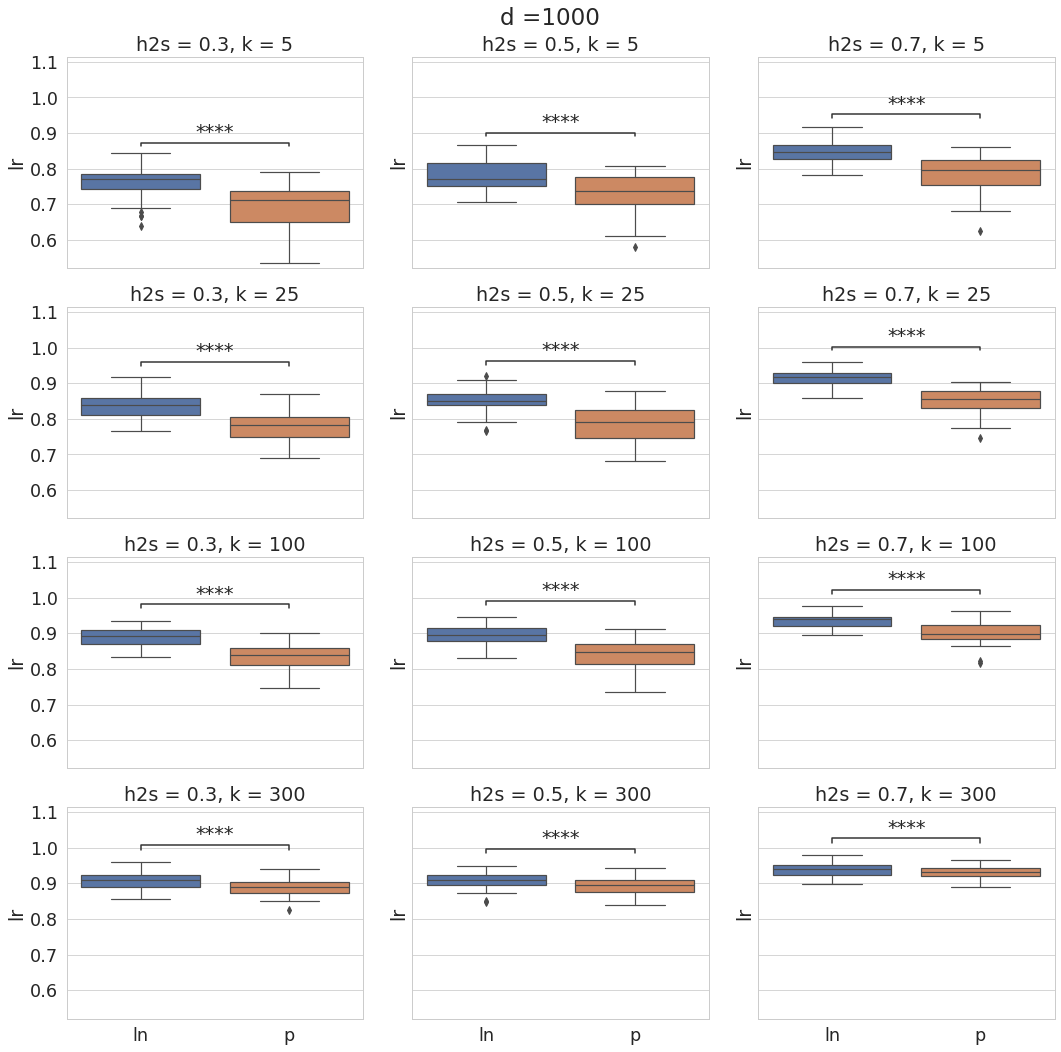

In [58]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()
plt.suptitle("d =1000")
dff = df.query("d == 1000")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


Text(0.5, 0.98, '3k')

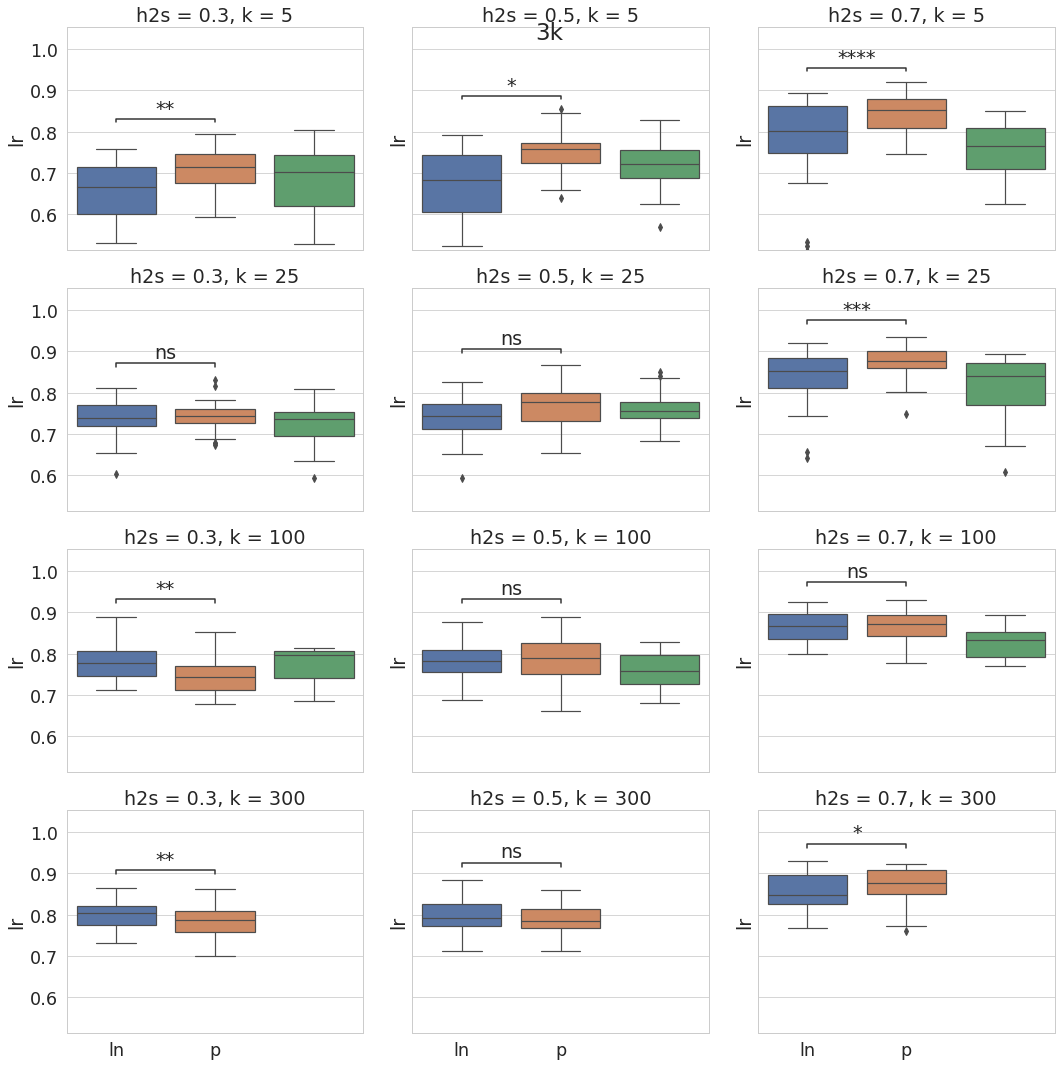

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_3k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("3k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '10k')

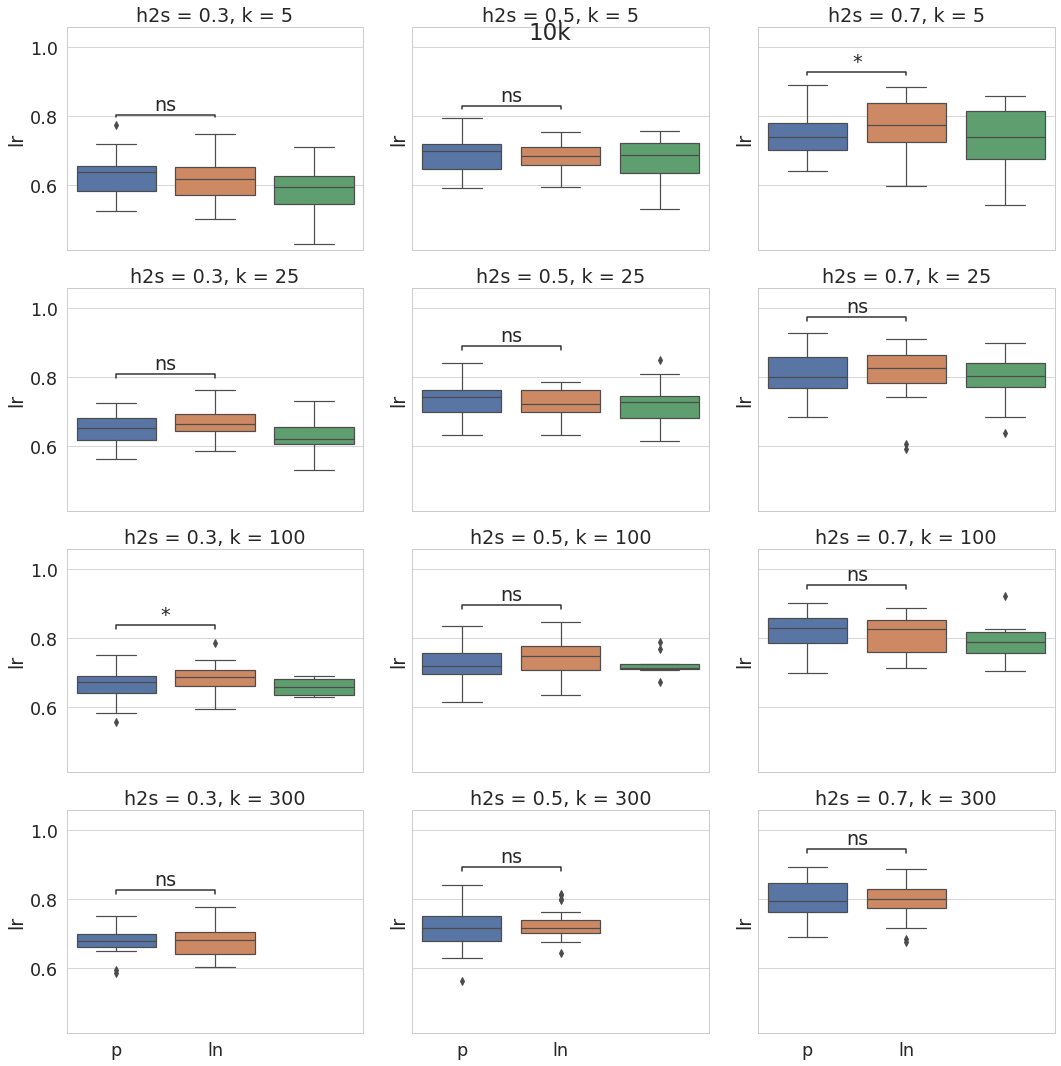

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_10k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["lr"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["lr"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("10k")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-package

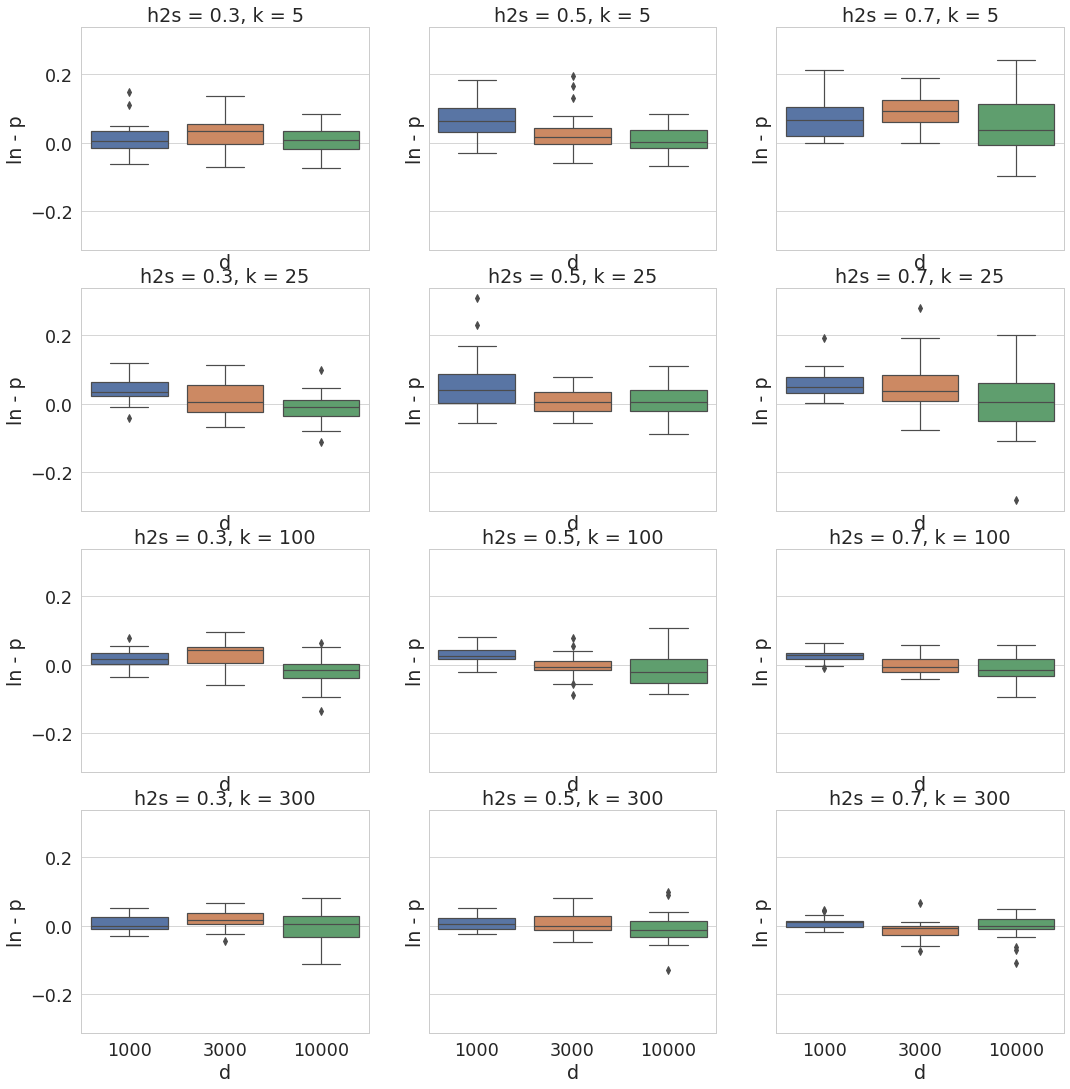

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    dff = final_delta[final_delta["h2s"] == h2s][final_delta["k"] == k]
    sns.boxplot(y=dff["lr", "delta"], x=dff["d"])
    plt.ylabel("ln - p")
    ax.set_title(f"h2s = {h2s}, k = {k}")

## SVM AUC

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '1k')

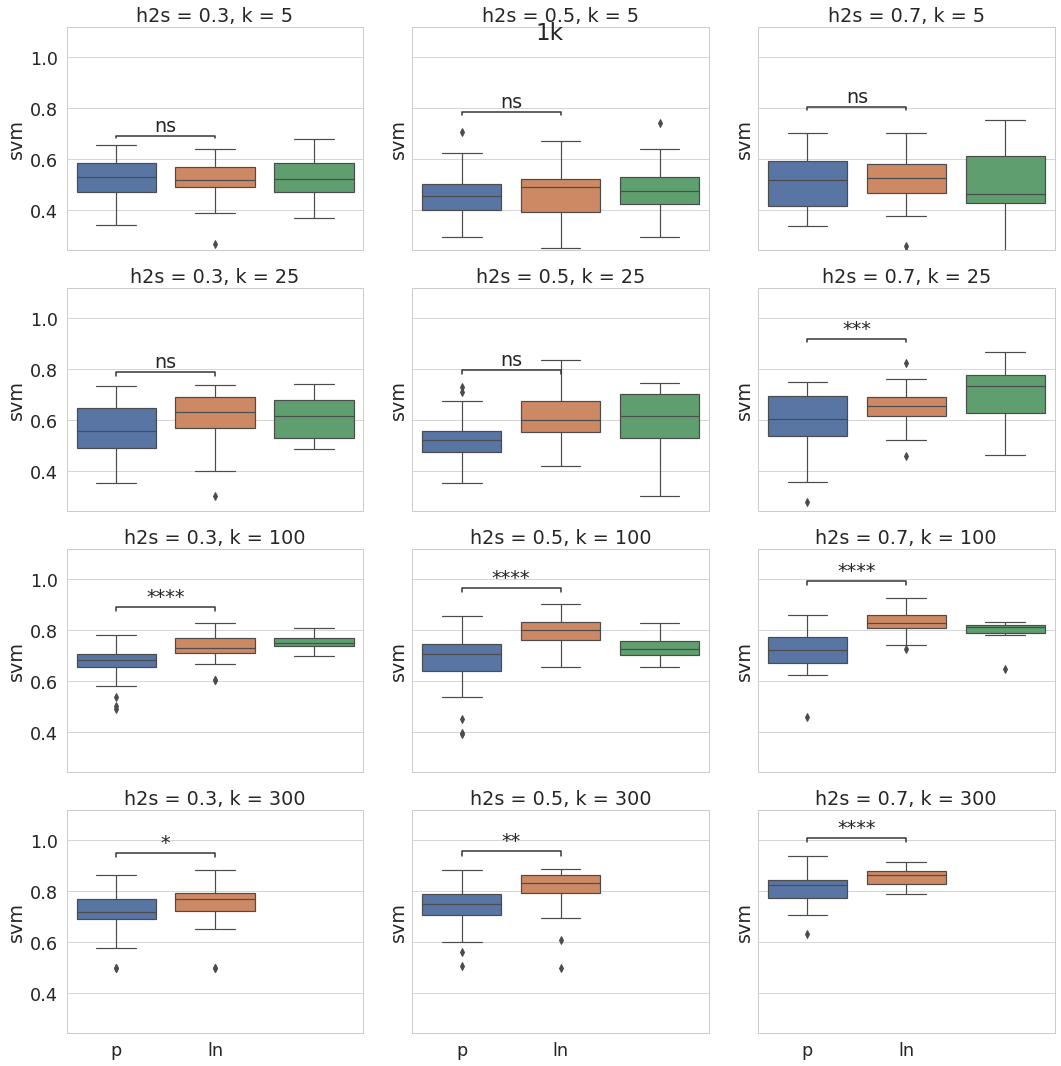

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_1k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("1k")

Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


Text(0.5, 0.98, '3k')

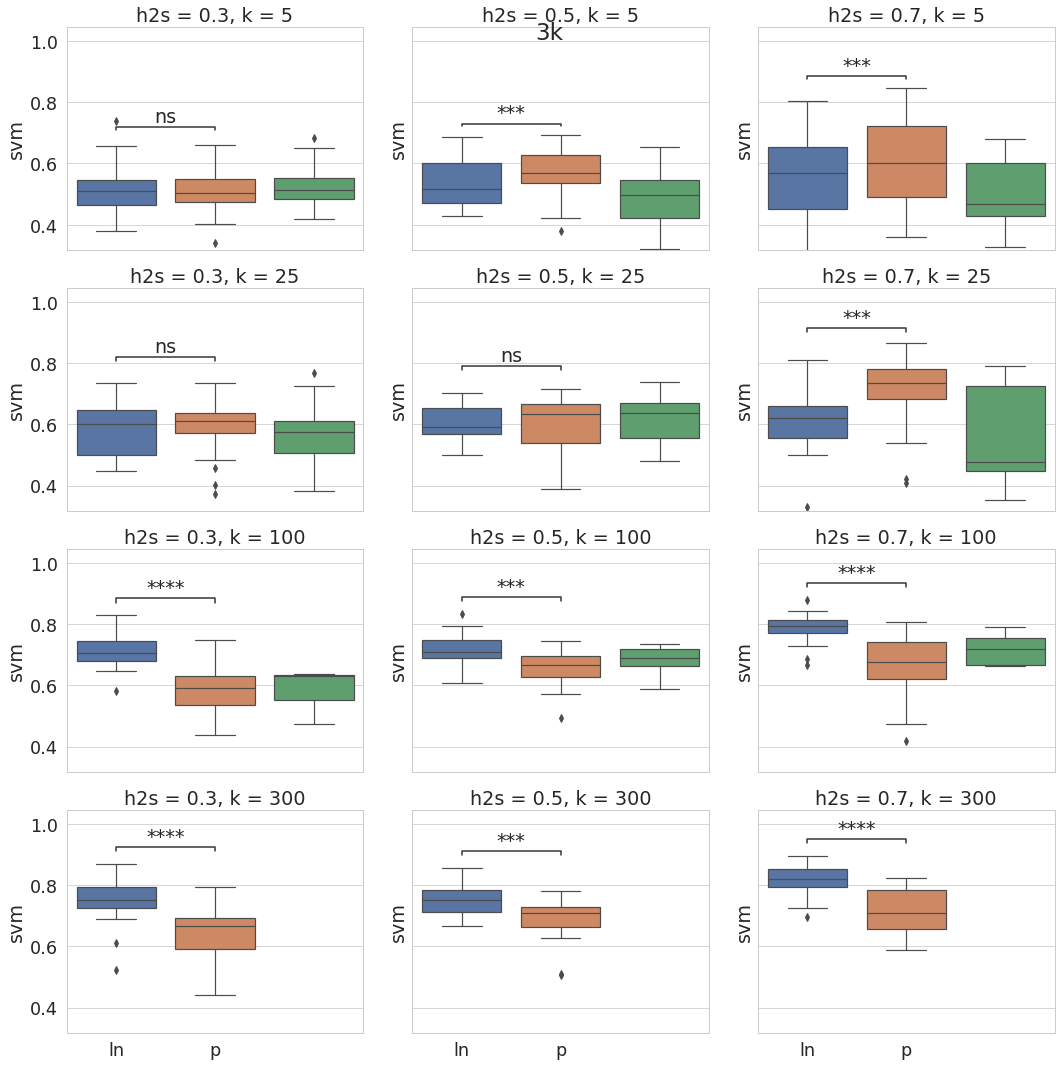

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_3k.query("method != 'ae'")
plt.tight_layout()
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

plt.suptitle("3k")

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


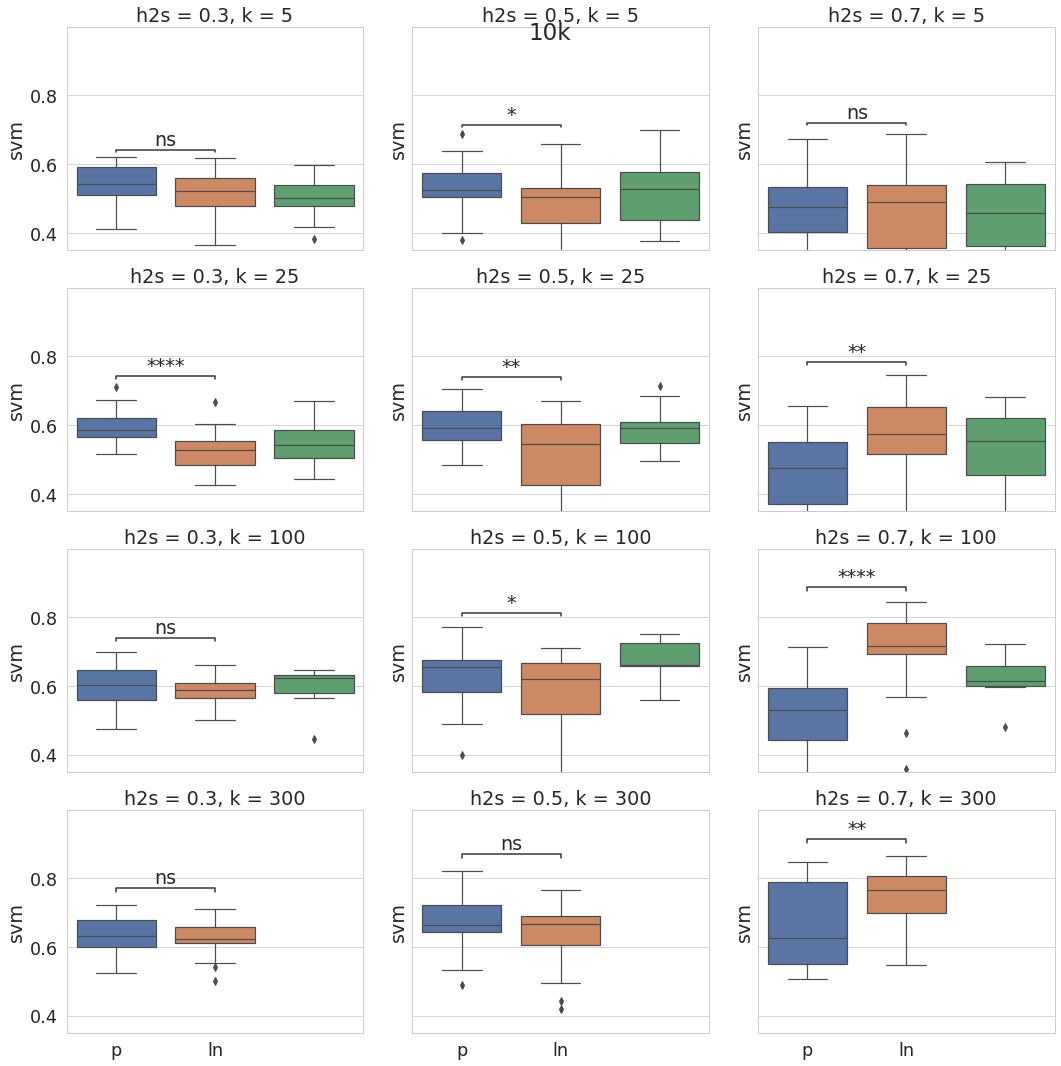

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

dff = df_10k.query("method != 'ae'")
plt.tight_layout()
fig.suptitle("10k")
for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    
    dfff = dff.query(f"k == {k} and h2s == {h2s}")
    
    sns.boxplot(x=dfff["method"], y=dfff["svm"])
    plt.xlabel("")
    
    test_results = add_stat_annotation(
        ax, x=dfff["method"], y=dfff["svm"], 
        order=["p", "ln", "hsic"],
        box_pairs=[
            ("ln", "p")
        ],
        test='Wilcoxon', text_format='star',
        loc='inside', verbose=0)
    plt.title(f"h2s = {h2s}, k = {k}")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shussain/miniconda3/lib/python3.7/site-package

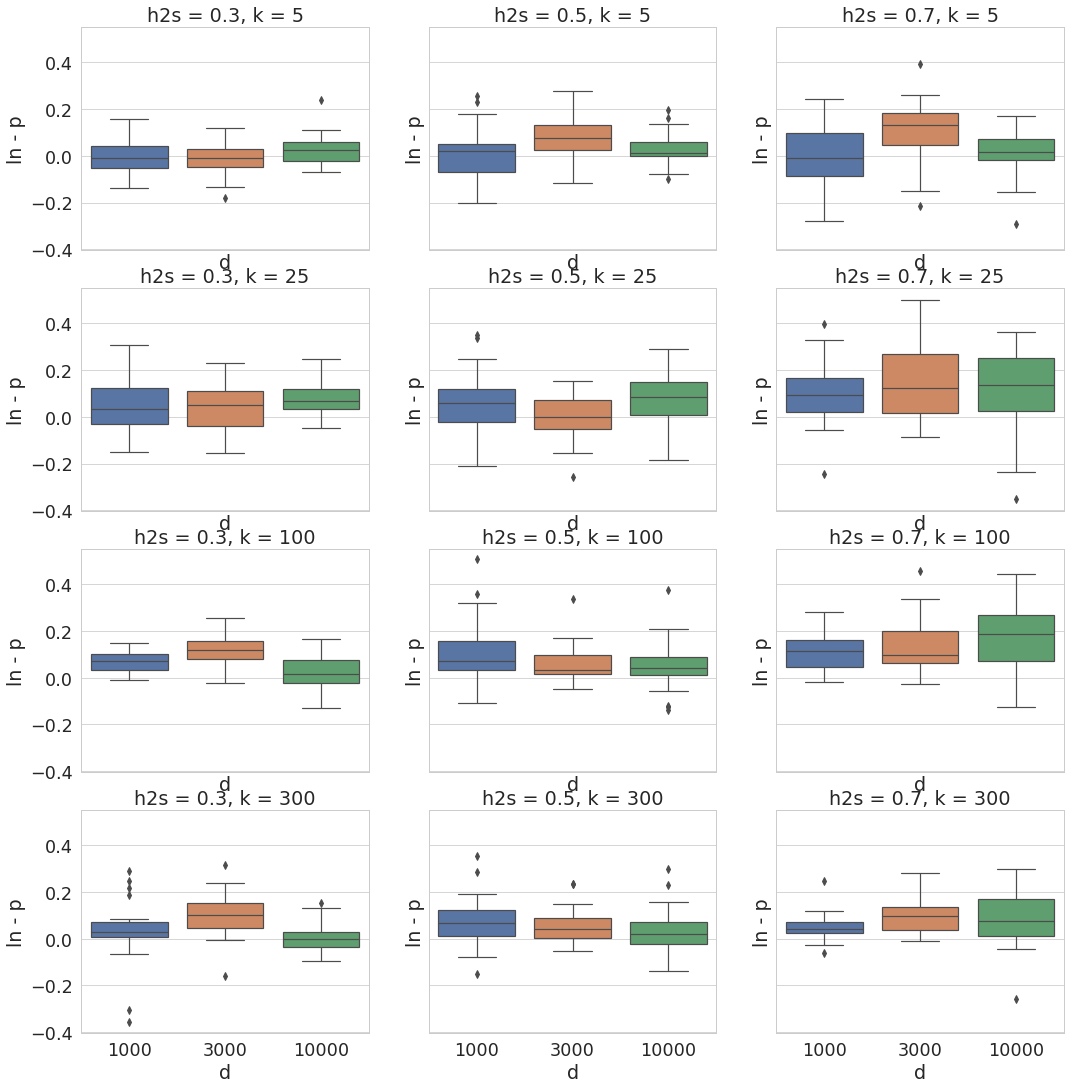

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), squeeze=False, sharex=True, sharey=True)
plt.tight_layout()

for (k, h2s), ax in zip(product([5, 25, 100, 300], [0.3, 0.5, 0.7]), axes.ravel()):
    plt.sca(ax)
    dff = final_delta[final_delta["h2s"] == h2s][final_delta["k"] == k]
    sns.boxplot(y=dff["svm", "delta"], x=dff["d"])
    plt.ylabel("ln - p")
    ax.set_title(f"h2s = {h2s}, k = {k}")

In [49]:
import glob
from pathlib import Path
dirs = glob.glob("n600/results/d_*/h2s_*/sim_*")

for dirr in dirs:
    d = int(Path(dirr).parts[2][2:])
    with open(dirr + "/n_causals.csv", 'r') as r:
        with open(dirr + "/n_causals1.csv", 'w') as w:
            for line in r.readlines():
                newline = line[:-1] + f",{d}\n"
                w.write(newline)
            #print(r.readlines(), "\n\n")